In [3]:
import numpy as np 
import pandas as pd 


In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [6]:
data = pd.read_csv('fraudTest.csv')

In [7]:
data.shape

(555719, 23)

In [8]:
pd.options.display.max_columns = None


In [9]:
new_data = data.drop(columns=data.select_dtypes(include='object').columns)


In [10]:
new_data.shape

(555719, 11)

In [11]:
new_data.tail()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0
555718,555718,4170689372027579,38.13,73034,35.6665,-97.4798,116001,1388534374,36.210097,-97.036372,0


In [12]:
new_data['is_fraud'].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

<Axes: xlabel='is_fraud'>

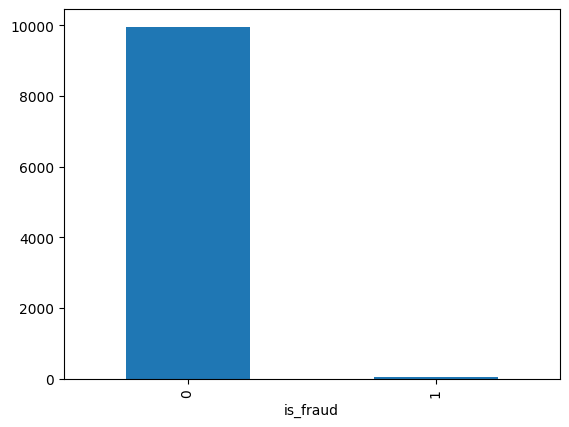

In [13]:
data.sample(10000)['is_fraud'].value_counts().plot(kind='bar')


In [14]:
from sklearn.utils import resample
import numpy as np

## 1> Oversampling in Data Balancing 

In [16]:
X = new_data.drop(columns=['is_fraud'])  # Features
y = new_data['is_fraud']

In [17]:
# Separate majority and minority classes
X_minority = X[y == 1]  # Assuming 1 is the minority class
y_minority = y[y == 1]

X_majority = X[y == 0]  # Assuming 0 is the majority class
y_majority = y[y == 0]

In [18]:
# Oversample minority class
X_minority_oversampled, y_minority_oversampled = resample(X_minority, y_minority, 
                                                          replace=True, # sample with replacement
                                                          n_samples=len(X_majority), # match the majority class size
                                                          random_state=42) # for reproducibility

# Combine oversampled minority class with the majority class
X_res = np.vstack((X_majority, X_minority_oversampled))
y_res = np.hstack((y_majority, y_minority_oversampled))

In [30]:
# Check class distribution after oversampling
print(f"Class distribution after oversampling:\n {np.bincount(y_res)}")# no of [1] and [0]

Class distribution after oversampling:
 [553574 553574]


In [32]:
# NumPy array (not a pandas DataFrame)
# Display the first 5 rows of X_res
print(X_res[:5])


[[ 0.00000000e+00  2.29116393e+15  2.86000000e+00  2.92090000e+04
   3.39659000e+01 -8.09355000e+01  3.33497000e+05  1.37181686e+09
   3.39863910e+01 -8.12007140e+01]
 [ 1.00000000e+00  3.57303004e+15  2.98400000e+01  8.40020000e+04
   4.03207000e+01 -1.10436000e+02  3.02000000e+02  1.37181687e+09
   3.94504980e+01 -1.09960431e+02]
 [ 2.00000000e+00  3.59821529e+15  4.12800000e+01  1.17100000e+04
   4.06729000e+01 -7.35365000e+01  3.44960000e+04  1.37181689e+09
   4.04958100e+01 -7.41961110e+01]
 [ 3.00000000e+00  3.59191980e+15  6.00500000e+01  3.27800000e+04
   2.85697000e+01 -8.08191000e+01  5.47670000e+04  1.37181692e+09
   2.88123980e+01 -8.08830610e+01]
 [ 4.00000000e+00  3.52682614e+15  3.19000000e+00  4.96320000e+04
   4.42529000e+01 -8.50170000e+01  1.12600000e+03  1.37181692e+09
   4.49591480e+01 -8.58847340e+01]]


In [33]:
print(y_res[:5])

[0 0 0 0 0]


In [36]:
len(X_res),len(y_res)

(1107148, 1107148)

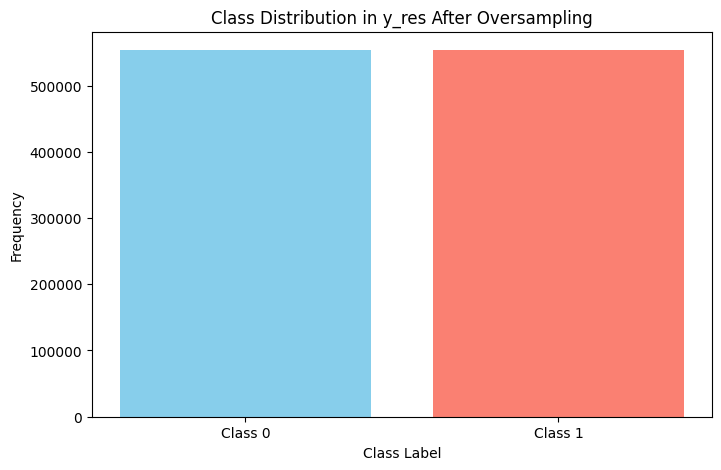

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the class distribution in y_res
class_counts = np.bincount(y_res)

# Plot the class distribution as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(range(len(class_counts)), class_counts, color=['skyblue', 'salmon'])
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_res After Oversampling')
plt.xticks(range(len(class_counts)), [f'Class {i}' for i in range(len(class_counts))])
plt.show()


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.49861355733188817

In [45]:
precision_score(y_test,y_pred1)

0.0

In [46]:
recall_score(y_test,y_pred1)


0.0

In [47]:
f1_score(y_test,y_pred1)


0.0

## Decision Tree

In [48]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred2 = dt.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred2)


0.9987716208282528

In [51]:
precision_score(y_test,y_pred2)

0.9975560227864935

In [52]:
recall_score(y_test,y_pred2)


1.0

In [53]:
f1_score(y_test,y_pred2)

0.9987765163101171

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [56]:
y_pred3 = rf.predict(X_test)
accuracy_score(y_test,y_pred3)

0.9997741950051935

In [57]:
precision_score(y_test,y_pred3)

0.9995498415442235

In [58]:
recall_score(y_test,y_pred3)

1.0

In [59]:
f1_score(y_test,y_pred3)

0.9997748701000477

In [60]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [61]:
final_data


,Models,ACC
0,LR,49.861356
1,DT,99.877162
2,RF,99.977420


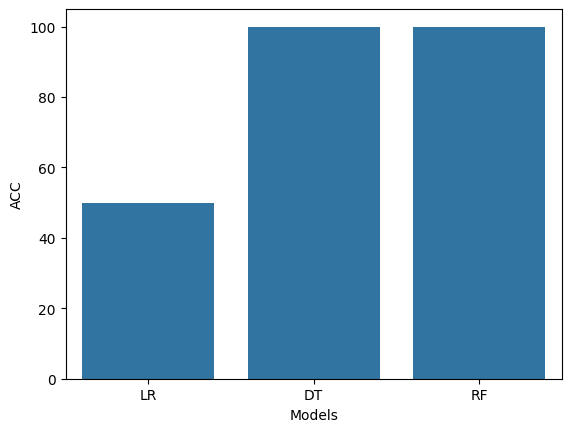

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is a DataFrame with columns 'Models' and 'ACC'
sns.barplot(x='Models', y='ACC', data=final_data)

# Optionally show the plot
plt.show()


## 2> SMOTE (Synthetic Minority Over-sampling Technique)

In [63]:
from imblearn.over_sampling import SMOTE

In [66]:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)

1.5.2
0.12.4


In [64]:
data.shape

(555719, 23)

In [69]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [71]:
# Encoding
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of type 'object' (usually string)
        data[col] = data[col].astype('category').cat.codes  # Convert strings to unique integer codes

# Display the first few rows to check the changes
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,157,39,29209,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,16,43,84002,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,61,33,11710,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,764,8,32780,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,247,21,49632,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [72]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 555719
Number of Columns 23


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  int32  
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  int16  
 4   category               555719 non-null  int8   
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  int16  
 7   last                   555719 non-null  int16  
 8   gender                 555719 non-null  int8   
 9   street                 555719 non-null  int16  
 10  city                   555719 non-null  int16  
 11  state                  555719 non-null  int8   
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [74]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [75]:
sc = StandardScaler()
data['amt']=sc.fit_transform(pd.DataFrame(data['amt']))

In [76]:
data.duplicated().any() #duplicate rows


False

In [77]:
data.shape


(555719, 23)

In [79]:
X = data.drop('is_fraud', axis=1) 
y = data['is_fraud']  # Target (0 = Legitimate, 1 = Fraud)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data


In [82]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

In [84]:
X_train_scaled.shape, X_resampled.shape

((389003, 22), (774996, 22))

In [85]:
y_resampled.shape

(774996,)

In [86]:
pd.Series(y_resampled).value_counts()

is_fraud
0    387498
1    387498
Name: count, dtype: int64

## Decision Tree

In [92]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_resampled, y_resampled)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [93]:

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
print("Performance after applying SMOTE:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Performance after applying SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.52      0.72      0.60       640

    accuracy                           1.00    166716
   macro avg       0.76      0.86      0.80    166716
weighted avg       1.00      1.00      1.00    166716

[[165659    417]
 [   182    458]]


In [101]:
accuracy_score(y_test,y_pred)

0.9964070635092013

In [115]:
precision_score(y_test,y_pred)

0.5234285714285715

In [116]:
recall_score(y_test,y_pred)

0.715625

In [114]:
f1_score(y_test,y_pred)


0.6046204620462046

## Random Tree

In [95]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [96]:
# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.80      0.73      0.76       640

    accuracy                           1.00    166716
   macro avg       0.90      0.86      0.88    166716
weighted avg       1.00      1.00      1.00    166716

[[165960    116]
 [   173    467]]


In [97]:
accuracy_score(y_test,y_pred_rf)

0.9982665131121188

In [98]:
precision_score(y_test,y_pred_rf)

0.8010291595197255

In [99]:
recall_score(y_test,y_pred_rf)

0.7296875

In [100]:
f1_score(y_test,y_pred_rf)

0.7636958299264105

## Logistic Regression

In [107]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [108]:
# Evaluate the model on the test set
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166076
           1       0.04      0.76      0.07       640

    accuracy                           0.92    166716
   macro avg       0.52      0.84      0.52    166716
weighted avg       1.00      0.92      0.96    166716

[[153368  12708]
 [   151    489]]


In [109]:
accuracy_score(y_test, y_pred_lr)

0.9228688308260755

In [110]:
precision_score(y_test, y_pred_lr)

0.03705387588088202

In [111]:
recall_score(y_test, y_pred_lr)

0.7640625

In [112]:
f1_score(y_test, y_pred_lr)

0.07068006070680061

In [119]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming you've already trained the models and have predictions for each
# Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
acc_lr = accuracy_score(y_test, y_pred_lr) * 100
precision_lr = precision_score(y_test, y_pred_lr) * 100
recall_lr = recall_score(y_test, y_pred_lr) * 100
f1_lr = f1_score(y_test, y_pred_lr) * 100

# Decision Tree
print("Decision Tree Performance:")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
acc_dt = accuracy_score(y_test,y_pred) * 100
precision_dt = precision_score(y_test,y_pred) * 100
recall_dt = recall_score(y_test,y_pred) * 100
f1_dt = f1_score(y_test,y_pred) * 100

# Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf) * 100
recall_rf = recall_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100

# Create a DataFrame with the metrics
final_data = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'ACC': [acc_lr, acc_dt, acc_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'F1_Score': [f1_lr, f1_dt, f1_rf]
})

final_data


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166076
           1       0.04      0.76      0.07       640

    accuracy                           0.92    166716
   macro avg       0.52      0.84      0.52    166716
weighted avg       1.00      0.92      0.96    166716

[[153368  12708]
 [   151    489]]
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.52      0.72      0.60       640

    accuracy                           1.00    166716
   macro avg       0.76      0.86      0.80    166716
weighted avg       1.00      1.00      1.00    166716

[[165659    417]
 [   182    458]]
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.80      0.73      0.76       640

    accuracy             

,Models,ACC,Precision,Recall,F1_Score
0,Logistic Regression,92.286883,3.705388,76.40625,7.068006
1,Decision Tree,99.640706,52.342857,71.56250,60.462046
2,Random Forest,99.826651,80.102916,72.96875,76.369583


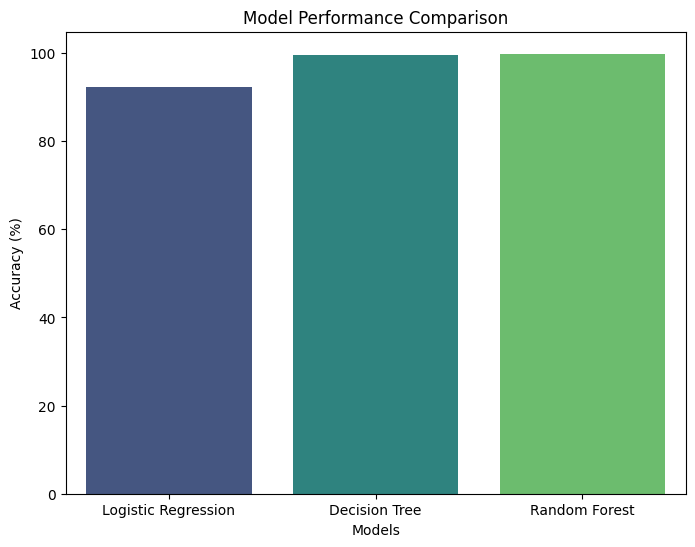

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the Accuracy of each model
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data, palette="viridis")
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')
plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 3> AdaBoostClassifier & BaggingClassifier

In [124]:
X.shape


(555719, 22)

In [126]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,-0.424463,151,115,1,341,157,39,29209,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,-0.252337,163,457,0,354,16,43,84002,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,-0.179353,24,249,0,865,61,33,11710,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,-0.059605,42,457,1,320,764,8,32780,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,-0.422358,247,261,1,548,247,21,49632,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [128]:
#already splited the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

##  AdaBoost Classifier

In [135]:

# AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_resampled, y_resampled)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [136]:
# Evaluate the AdaBoost model
y_pred_ada = ada_model.predict(X_test_scaled)
print("AdaBoost Performance:")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost Performance:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    166076
           1       0.05      0.81      0.10       640

    accuracy                           0.94    166716
   macro avg       0.53      0.88      0.54    166716
weighted avg       1.00      0.94      0.97    166716

[[156794   9282]
 [   119    521]]


## Bagging Classifier

In [ ]:
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_resampled, y_resampled)

In [ ]:
y_pred_bagging = bagging_model.predict(X_test_scaled)
print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))

In [ ]:
# Evaluate the AdaBoost model
print("AdaBoost Performance:")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
acc_ada = accuracy_score(y_test, y_pred_ada) * 100
precision_ada = precision_score(y_test, y_pred_ada) * 100
recall_ada = recall_score(y_test, y_pred_ada) * 100
f1_ada = f1_score(y_test, y_pred_ada) * 100

# Evaluate the Bagging model
print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
acc_bagging = accuracy_score(y_test, y_pred_bagging) * 100
precision_bagging = precision_score(y_test, y_pred_bagging) * 100
recall_bagging = recall_score(y_test, y_pred_bagging) * 100
f1_bagging = f1_score(y_test, y_pred_bagging) * 100

# Create a DataFrame with the metrics for both AdaBoost and Bagging
comparison_data = pd.DataFrame({
    'Models': ['AdaBoost', 'Bagging Classifier'],
    'Accuracy': [acc_ada, acc_bagging],
    'Precision': [precision_ada, precision_bagging],
    'Recall': [recall_ada, recall_bagging],
    'F1_Score': [f1_ada, f1_bagging]
})

print(comparison_data)

In [ ]:
# Plotting the comparison for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
plt.figure(figsize=(10, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Models', y=metric, data=comparison_data, palette="viridis")
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(f'{metric} (%)')
    plt.ylim(0, 100)  # Optional: Set y-axis limits for better visual comparison

plt.tight_layout()
plt.show()